# Housing data set example

Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
# Fix the path to match the data file location
df = pd.read_csv('housing.data', sep='\s+')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Variable interpretation:

- CRIM: per capita crime rate
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio
- B: proportion of African American population
- LSTAT: percentage of lower status population
- MEDV: Median value of owner-occupied homes in thousands of dollars

Save column names into a list for future use:

In [3]:
col_names = df.columns.tolist()

In [4]:
df = df.astype(np.float64)
scaler = StandardScaler(with_mean=True, with_std=True)
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [5]:
X = df_scaled.drop('MEDV', axis=1)
y = df_scaled['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Compute MSE. This is hard to intepret for standardized data, so we repeat this later for the original dataframe.

In [6]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.39622312081101396


Show the coefficients...

In [7]:
coefs = model.coef_
print(coefs)

[-0.11170888  0.11355512  0.0040916   0.06464537 -0.20314718  0.28332859
 -0.00955245 -0.31742067  0.23117321 -0.20138531 -0.24620385  0.08050481
 -0.38262731]


... aside with the variable names

In [8]:
i = 0
for c in coefs:
    print (f"{col_names[i]:12s}{c:7.3f}")
    i = i+1

CRIM         -0.112
ZN            0.114
INDUS         0.004
CHAS          0.065
NOX          -0.203
RM            0.283
AGE          -0.010
DIS          -0.317
RAD           0.231
TAX          -0.201
PTRATIO      -0.246
B             0.081
LSTAT        -0.383


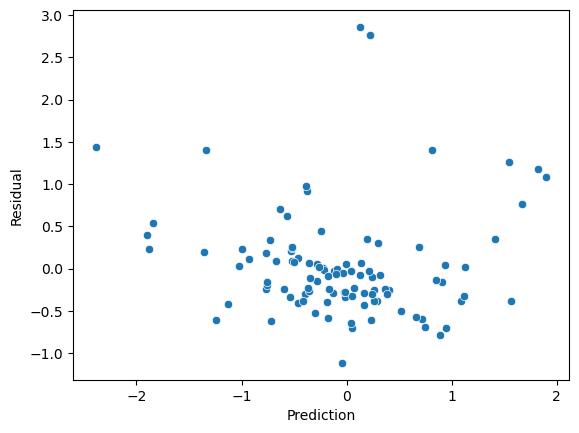

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

Show the MSE and the coefficients for non-standardized data. Note that variable importance must not be inferred from non-standardized data.

In [10]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefs = model.coef_
i = 0
for c in coefs:
    print (f"{col_names[i]:12s}{c:7.3f}")
    i = i+1


Mean Squared Error: 33.44897999767632
CRIM         -0.119
ZN            0.045
INDUS         0.005
CHAS          2.341
NOX         -16.124
RM            3.709
AGE          -0.003
DIS          -1.386
RAD           0.244
TAX          -0.011
PTRATIO      -1.046
B             0.008
LSTAT        -0.493


In [11]:
print (model.intercept_)

38.091694926302004
